# CMPT 423/820
## Assignment 4 Question 2
* Marking Scheme and Grading Guidelines
* 24 marks

### Importing common libraries

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing other libraries 
We'll import the SVM library, and the library that lets us work with artificial and built-in datasets.

In [3]:
from sklearn import svm
from sklearn import datasets

### A function to visualize how a classifier works on given data
The function below is basically MatPlotLib magic to make nice visualizations of the SVM classifier for simple 2D data.  It fits the given classifier, and retrieves the support vectors from it afterward.  As a result, it's specialized to 2D SVM models.

The separating hyperplane is a solid line, and the two margins are visualized as dashed lines.  The support vectors, i.e., the data points that contribute towards the location of the separating hyperplane, are visualized as circled points.  Data that are not circled do not affect the location of the hyperplane.

You can call this function without having to understand everything it's doing. 

In [4]:
def plot_hyperplane(svm_clf, X, y):
    """ Plot the separating hyperplane determined by svm_clf on data X with classes y.
        The classifier svm_clf is assumed not to have been fitted to the data already.
        Data is assumed to be 2D, with exactly 2 class labels.
    """
    # first do the fitting
    svm_clf.fit(X, y)
    
    # plot the data values X
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svm_clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['-.', '-', '--'])
    # plot support vectors
    ax.scatter(svm_clf.support_vectors_[:, 0], svm_clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

### Generate some synthetic data
We can generate some synthetic data using some built in tools provided by scikit in the library ```sklearn.datasets```.  
* ```make_blobs()``` creates separable clusters in 2D.
* ```make_circles()``` creates a blob with another set of samples in a circle around it.
* ```make_moons()``` creates semi-circles that are not linearly separable

For the ```plot_hyperplane()``` function above, we're limited to two classes for the visualization.  To generate new data change the ```random_state``` value.  

These datasets are 2D, so we can visualize them.  

In [5]:
blob_X, blob_y = datasets.make_blobs(n_samples=40, centers=2, random_state=34)
circ_X, circ_y = datasets.make_circles(n_samples=40, random_state=84)
moon_X, moon_y = datasets.make_moons(n_samples=40, random_state=61)

#### Regularization in  SVM models
In class, we approached regularization by formulating a Loss function that balanced error against the complexity of the model. 
$$ Loss(x, m) = Err(x, m) + \lambda Complexity(m) $$
When $\lambda$ gets bigger, the Complexity of the model contributes more to the Loss, and simpler models are emphasized.  When $\lambda$ gets big enough, the compromise between cost and complexity may incur increased error, just to keep the complexity cost down.

It turns out that some machine learning models, including SVM, traditionally use a different formulation:
$$ Loss(x, m) = C \times Err(x, m) + Complexity(m) $$
In this formulation, as $C$ gets smaller, the Complexity of the model contributes more to the Loss, and simpler models are emphasized.  

Either way, it's the relative balance between error and complexity that matters.  In the scikit libraries, we can indicate how to balance error and complexity using the keyword parameter ```C=1.0```  To emphasize Error, make ```C>>>1``` .  To emphasize complexity, make ```C<<1```.

#### Apply a simple linear SVM to some data

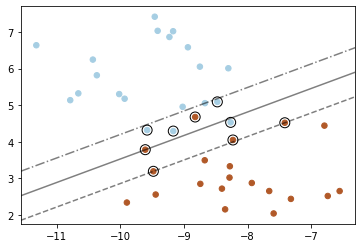

In [6]:
plot_hyperplane(svm.SVC(kernel='linear', C=1), blob_X, blob_y)

#### Apply SVM with a Polynomial Kernel to some data

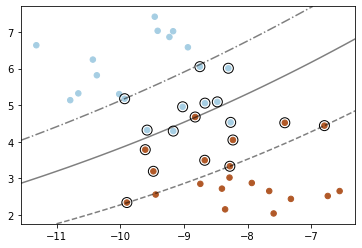

In [7]:
plot_hyperplane(svm.SVC(kernel='poly', degree=3, C=1), blob_X, blob_y)

#### Apply SVM with a Radial Basis Function Kernel to some data

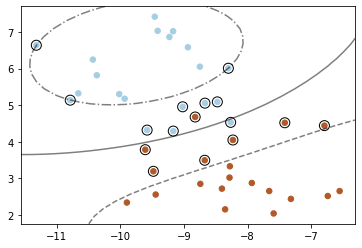

In [8]:
plot_hyperplane(svm.SVC(kernel='rbf', gamma=0.1, C=1), blob_X, blob_y)

# Part 1 --- Kernels!

Describe the term *kernel* in the context of Support Vector Machines.  Explain the polynomial kernel, and the Radial Basis function kernel.  

## Part 1 Answer

In general, a *kernel* is a function that takes two vectors as arguments, and produces a scalar value.  There are mathematical restrictions on kernels: including that they have to be symmetric in their arguments; the textbook (Bisho Ch 6.2 talks about kernels nand their properties).

A kernel function can be applied to data samples, but is not limited to this usage.  When applied to data samples, we can interpret the kernel as performing a dot-product of the two data samples in a new feature space.  The definition is as follows:

$$ k(\mathbf{x}, \mathbf{y}) = \phi(\mathbf{x})^\mathrm{T}\phi(\mathbf{y}) $$

In this definition, $x^Ty$ represents the dot-product (also called "inner product").  The function $\phi()$ is any function that maps a vector from one space to another.  The function $\phi$ can map to a higher or lower dimensional space, or can warp the coordinates, or almost anything at all, as long as it produces a new vector.

The **linear kernel** is defined by $$k(\mathbf{x}, \mathbf{y}) = \mathbf{x}^\mathrm{T}\mathbf{y}$$
that is, just the normal dot-product, with no prior transformation to another space ($\phi$ is the identity function $\phi(x) = x$)

The **polynomial kernel** is defined by $$k(\mathbf{x}, \mathbf{y}) = (\mathbf{x}^\mathrm{T}\mathbf{y})^d $$
It starts with the same dot-product as the linear kernel, but raises the result to a constant power, $d$.  In some formulations, a constant $c$ is added to the dot-product prior to exponentiation.  The polynomial kernel has the effect of stretching large scalars (i.e., all $x$ where $|x| > 1$), and shrinking small ones (i.e, all $x$ where $|x| < 1$).  

Since polynomial kernel uses the dot-product, we can interpret this further.  The dot product $x^Ty$ will be higher when $x$ and $y$ are more or less along the same direction, and closer to zero when they are in orthogonal directions (i.e., at right angles).  

The **radial basis kernel** is defined by 
$$k(\mathbf{x}, \mathbf{y}) = \frac{\exp(-||\mathbf{x} - \mathbf{y}||^2)}{\gamma} $$
where $\gamma$ is a positive constant.  Sometimes also called the Gaussian kernel, in which case $\gamma$  is usually replaced by somethien that looks more like what we'd see in the Gaussian probability density function: $2\sigma^2$.  

This looks quite different from the linear and polynomial kernels.  Notice that the bigger the difference between $x$ and $y$, the smaller the result of the kernel function.  Unlike the normal dot-product, which is concerned with direction, the radial basis kernel is concerned with location.  

## Part 1 Grading -- 6 marks

**Grading should be generous here.  Deduct marks only when effort was lacking, or if descriptions are quite wrong.**

1. 6 Marks **Kernels!** 
  * (2 marks) You description of the term *kernel* demonstrated understanding.
  
     * To get full marks, the description indicates that it maps pairs of vectors (or data samples) to a single scalar value.  Presentation of the equation (as above) satisfies this requirement, but is not required.  The idea of mapping to a feature space is also good, but not required.  A description of the linear kernel is not required.
    
  * (2 marks) Your desciption of the polynomial kernel demonstrated understanding.
     * To get full marks, the description should indicate that the result of the normal dot-product is raised to a constant power.  Presentation of the equation (as above) satisfies this requirement, but is not required.  Any sort of description that attempts to interpret the kernel geometrically or mathematically is valid, unless it's quite wrong.  Some examples of acceptable ideas:
        * A straight line in the polynomial feature space is likely to look curved in normal space; 
        * A straight line in normal space will look like a degree $d$ polynomial in the feature space.
     
  * (2 marks) Your desciption of the Radial Basis Function kernel demonstrated understanding. 
     * To get full marks, the description should indicate that the RBF kernel uses the $\exp$ function, and the difference between two points or vectors.  Presentation of the equation (as above) satisfies this requirement, but is not required.  Any sort of description that attempts to interpret the kernel geometrically or mathematically is valid, unless it's quite wrong.      Some examples of acceptable ideas:
        * RBF expresses similarity by distance
        * RBF looks for circles 
        * Points $x$ and $y$ that are on the same circle in normal space will be mapped to a common value. 

# Part 2 --- Exploring the balance between error and model complexity

Explore what happens to the three models (```linear```, ```poly```, ```rbf```) when you change ```C```.  Use ```C=1000``` and ```C=0.001``` **on the blob dataset.**  Your answer may depend on the dataset you are using (so if you change the ```random_state```, the behaviour may change).   

#### Apply a simple linear SVM to some data

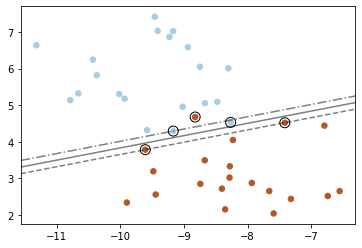

In [9]:
plot_hyperplane(svm.SVC(kernel='linear', C=1000), blob_X, blob_y)

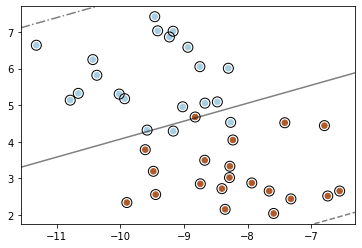

In [10]:
plot_hyperplane(svm.SVC(kernel='linear', C=0.005), blob_X, blob_y)

#### Discussion
When $C$ is quite high, the error term dominates the loss function.  This results in a narrow margin, and a few support vectors (circled data points).  This is all nicely visible in the plots above.  

When $C$ is quite small, the error is almost irrelevant, and the complexity dominates the loss function.  In the plot above, we see lots of support vectors.  And we see one of the three lines.  The other two lines are not visible in the scale of the plot. 

It appears that the visible line here is one of the margin lines, but I think that's a bug in the ```plot_hyperplane()``` function.  If we decrease the value of $C$ gradually, what we see is the widening of the margins, with the separating hyper-plane remaining more or less fixed.  Only when the two margin lines are pushed outside of the scale represented above do we see the sudden change in line style where the separating hyperplane used to be.

#### Apply SVM with a Polynomial Kernel to some data

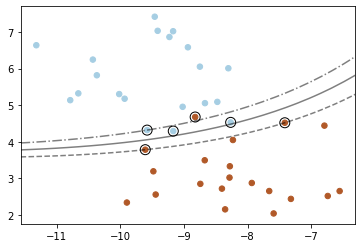

In [11]:
plot_hyperplane(svm.SVC(kernel='poly', degree=3, C=1000), blob_X, blob_y)

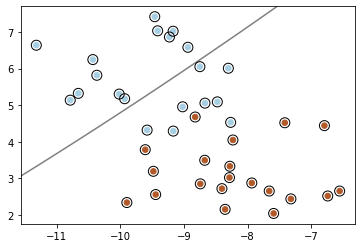

In [12]:
plot_hyperplane(svm.SVC(kernel='poly', degree=3, C=0.001), blob_X, blob_y)

#### Discussion
When $C$ is quite high, the error term dominates the loss function.  This results in a narrow margin, and a few support vectors (circled data points).  This is all nicely visible in the plots above. 

When $C$ is quite small, the error is almost irrelevant, and the complexity dominates the loss function.  In the plot above, we see lots of support vectors.  And we see one of the three lines.  The other two lines are not visible in the scale of the plot. 

One of the observations that could be made is that the lines appear to bend more when $C$ is large, and less when $C$ is small.  The separating hyperplane seems to emphasize more extreme support vectors when trying to minimize error, but emphazes more sensible support vectors when minimizing the complexity of the hyperplane.

#### Apply SVM with a Radial Basis Function Kernel to some data

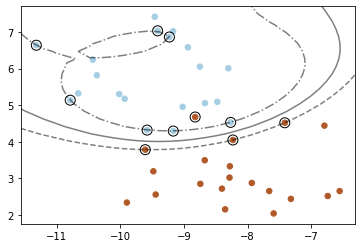

In [13]:
plot_hyperplane(svm.SVC(kernel='rbf', gamma=0.1, C=1000), blob_X, blob_y)

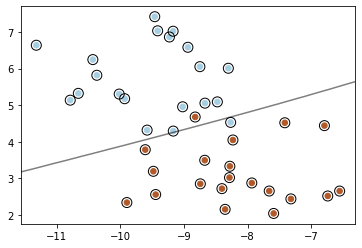

In [14]:
plot_hyperplane(svm.SVC(kernel='rbf', gamma=0.1, C=0.001), blob_X, blob_y)

#### Discussion
When $C$ is quite high, the error term dominates the loss function.  This results in a narrow margin, and a few support vectors (circled data points).  The RBF kernel is showing its uniqueness, in the elliptical nature of the margins.  

When $C$ is quite small, the error is almost irrelevant, and the complexity dominates the loss function.  In the plot above, we see lots of support vectors.  And we see one of the three lines.  The other two lines are not visible in the scale of the plot. 

The line that we do see is the separating hyperplane, and it's as close to straight as a curve can be. 

## Part 2  Grading --- 6 marks

I think the bug in ```plot_hyperplanes()``` was not obvious (it's a consequence of matplotlib, not the script), so it's okay if student responses do not correctly identify when a single line is the actual separating hyperplane, and call it a margin line (because that's what it looks like).

1. **Balance between error and model complexity**. 6 Marks
  * (2 marks) Your discussion on the behaviour of the ```linear``` kernel as ```C``` changes reflects an understanding of SVM.
    * The main point in all of this is that reducing error means narrowing the margins, and reducing model complexity results in broadening of the margins.
    
  * (2 marks) Your discussion on the behaviour of the ```poly``` kernel as ```C``` changes reflects an understanding of SVM.
    * Lines get curvier with large $C$, in addition to narrower margins.
    
  * (2 marks) Your discussion on the behaviour of the ```rbf``` kernel as ```C``` changes reflects an understanding of SVM.
    * Lines get curvier with large $C$, in addition to narrower margins.



# Part 3 --- Polynomial Kernel Exploration
Explore the Polynomial kernel, by using the optional keyword parameter ```degree``` which is available in scikit, **on the blob dataset.**  Use a couple of different integers for the degree (in the range 2-5, to limit computation times), and explain what happens. You may explore other ```svm.SVC``` parameters in the context of exploring degree, but this is optional.

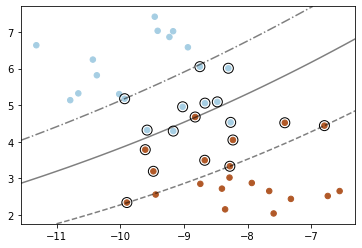

In [15]:
plot_hyperplane(svm.SVC(kernel='poly', degree=3, C=1), blob_X, blob_y)

As the degree of the polynomial increases, the separating hyperplane changes shape.
  * $d=2$: a line gently curving up to the right
  * $d=3$: a curve folding up and back to the right
  * $d=4$: a curve in the form of a stretched out S
  * $d=5$: a stretched out S-curve, but the margins are very narrow.

## Part 3 Grading --- 3 Marks

1. **Explore the Polynomial kernel** 3 marks
  * (3 marks) Your explanation of the behaviour of the polynomial kernel with different degrees reflects an understanding of SVM.
    * For full marks, some attempt to describe how the degree parameter (```degree``` in the Python, $d$ in the definition above) affects the separating hyperplane.

# Part 4 --- RBF Kernel Exploration
Explore the Radial Basis Function kernel, by using the optional keyword parameter ```gamma```, **on the blob dataset.**  Try various extreme values for ```gamma```, and explain what happens.  You may explore other ```svm.SVC``` parameters in the context of exploring degree, but this is optional.

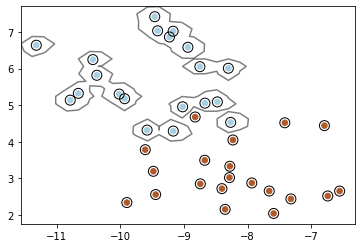

In [16]:
plot_hyperplane(svm.SVC(kernel='rbf', gamma=100, C=1), blob_X, blob_y)

As ```gamma``` changes, the separating hyperplane changes shape.
  * $\gamma=0.01$: the separating hyperplane is almost straight, the margin lines are curved slightly away.
  * $\gamma=0.1$: the separating hyperplane is curving upwards; one of the margin lines is an ellipse.
  * $\gamma=1$: the separating hyperplane is a complex curve, folding back on itself; the margin lines are are closed curves shaped to fit the example data.
  * $\gamma=10$: the separating hyperplane is a complex curve completely surrounding one of the data sets.  The margin lines are expressed as a collection of tight closed curves around the data samples.  
  * $\gamma=100$: It looks like only the separating hyperplane is being displayed here (same bug as mentioned earlier).  The separating hyperplane is a complex curve completely surrounding different subsets of one of the class examples.  The margin lines are not visible.

In general, the higher $\gamma$, the more the separating hyperplane is over-fitting to the data set.

### Part 4 Grading --- 3 marks

1. **Explore the Radial Basis Function kernel** 3 marks
  * (3 marks) Your explanation of the behaviour of the Radial Basis Function kernel with different degrees reflects an understanding of SVM.
    * For full marks, some attempt must be made to describe how the ```gamma``` parameter affects the shape of the separating hyperplane. 
    * it would not be wrong to mention over-fitting here, but it is not required for full marks.

# Part 5 --- Other synthetic datasets

Explore all three different kernels on the two other datasets above.  Choose a parameter setting for each kernel, including a value for ```C```, that seems to be lead to what you consider a good fit.  Explain briefly why you decided on the ```svm.SVC``` parameter settings that you chose.

## Part 5 Answer

### Circle Data Set

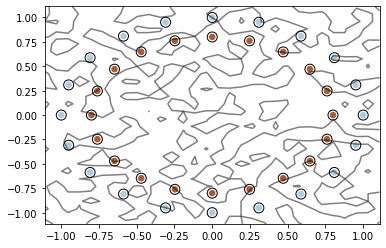

In [17]:
plot_hyperplane(svm.SVC(kernel='linear', C=1), circ_X, circ_y)

I used the default value for $C$, and there are no other parameters for the linear kernel SVM.  The result is very odd.  We see only one line, which is presumably the separating hyperplane.  But we expect a straight line in this case, which definitely didn't happen.  No line will do well with this data set, and SVC seems to be converging on a "line" with zero slope and zero intercept, but not quite zero due to the limited precision of computer arithmetic.  That means every point in the plane should be zero in principle, but in practice, the points are only more or less zero.  The line shows where zero was reached.  It turns out to be noise.

I would say that the linear kernel is inappropriate for this dataset, or in other words, there is no good setting.

#### Apply SVM with a Polynomial Kernel to some data

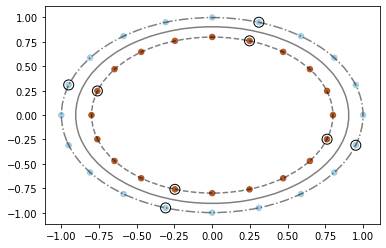

In [18]:
plot_hyperplane(svm.SVC(kernel='poly', degree=2, C=10), circ_X, circ_y)

I explored even and odd degree ($d$).  The odd degree results were similar to the linear kernel, with a noisy set of lines and closed curves visualized as as separating hyperplane.  These were rejected as inappropriate.

The even degree results were promising, showing a nice circular separating hyperplane between the two classes.  The picture did not chnge much with increasing even $d$, so I am claiming $d=2$ as an appropriate selection.  These really are circles, even though they look like ellipses!

Increasing $C$ here leads to narrower margins.  When $C=10$, the margins get pretty clode to the true separation between the two classes.    Increasing $C > 10$ changes only the number of support vectors.

My final setting is $d=2, C=10$.

#### Apply SVM with a Radial Basis Function Kernel to some data

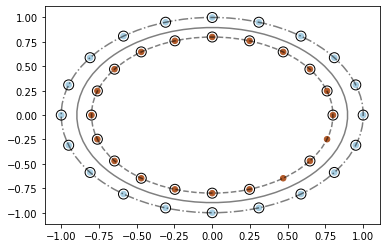

In [19]:
plot_hyperplane(svm.SVC(kernel='rbf', gamma=1, C=10), circ_X, circ_y)

Looking at the scale of the plot, we can see that the circles have radius close to 1.  If the data were more spread out, using a $\gamma$ that scales the data to a unit circle is probably useful.  Setting $\gamma = 1$ yields nice circles that don't improve with higher $\gamma$.  If $\gamma$ gets too high, we begin to see concentric circles and other weirdness.

Setting $C=10$ brought the margins very close to the true separation for of the two classes.

My final setting is $\gamma=1, C=10$.

### Moon Data Set

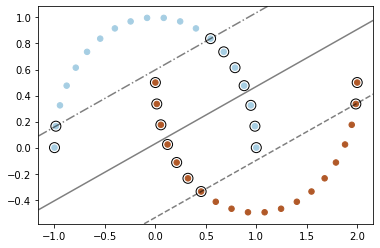

In [20]:
plot_hyperplane(svm.SVC(kernel='linear', C=1), moon_X, moon_y)

I used the default value for $C$, and there are no other parameters for the linear kernel SVM.  The resulting separating hyperplane is about as good as any straight line could get.  Increasing $C$ didn't seem to have an effect.

If linear SVM were the only choice, we'd have to live with this kind of error, even though there is a pattern evident here.

#### Apply SVM with a Polynomial Kernel to some data

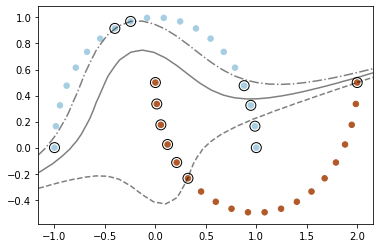

In [21]:
plot_hyperplane(svm.SVC(kernel='poly', degree=3, C=10), moon_X, moon_y)

I initially kept $C=1$ fixed, and explored even and odd degree ($d$).

The even degree results created symmetric hyperplanes that seemed to classify only a small handful of the data points correctly.   These were rejected as inappropriate.  The odd degree results equally unpromising, until I tried higher $C$.  

Using $C=10$ emphasizes error over keeping model complexity low.  With this setting, the $d=3$ separating hyperplane seemed to find a curve that could keep all of the browish points (lower) classified correctly, and most of the upper points (but not all).  

Increasing $C$ beyond $C=10$ did narrow the magins, but made the margin lines look contrived and over-fitted.  Increasing $d$ to odd degrees beyond $d=3$ made the separating hyperplane fit more closely to the upper data set, and seemed to be avoiding the lower set too much.  

My final setting is $d=3, C=10$.

#### Apply SVM with a Radial Basis Function Kernel to some data

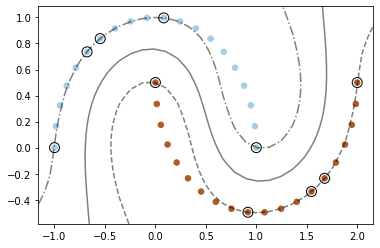

In [22]:
plot_hyperplane(svm.SVC(kernel='rbf', gamma=1, C=10), moon_X, moon_y)

I started with the setting $\gamma=1, C=10$ from the circle dataset.  This setting created a nice neat curve that correctly separated all the data.  The margin lines pretty faithfully expressed the true separation of the data points.

Reducing to $\gamma=0.1, C=10$ ruined the shape of the separating hyperplane, though increasing $C$ seems to help improve the shape of the curve again.

Increasing to $\gamma=3, C=10$ kept the  shape of the separating hyperplane, but produced margin lines that consisted of multiple closed curves around subsets of the data points.

My final setting was $\gamma=1, C=10$.

## Part 5 Grading --- 6 marks

5. 6 marks **Other datasets** 
  * (3 marks) Your explanation for your choice of parameters for all three kernels reflects an understanding of the application of SVM to the ```circ``` dataset created by ```make_circles```.
    * full marks for each kernel if a justification was given.
    * Partial credit if just settings were given.
        * There is no good setting for linear SVC.  The weird plot is evidence of something not working right, but it may not have been obvious.  
        * Even degree polynomials should work well with circular data.  
        * Non-extreme values for $\gamma$ should be preferred.
  * (3 marks) Your explanation for your choice of parameters for all three kernels reflects an understanding of the application of SVM to the ```moon``` dataset created by ```make_moons```.
    * full marks for each kernel if a justification was given.
    * Partial credit if just settings were given.
         * There is no good setting for linear SVC.  But at least the plot makes sense. 
        * Odd degree polynomials work best.
        * Non-extreme values for $\gamma$ should be preferred.       

# Marking Scheme

1. 6 Marks **Kernels!** 
  * (2 marks) You description of the term *kernel* demonstrated understanding.
  * (2 marks) Your description of the polynomial kernel demonstrated understanding.
  * (2 marks) Your description of the Radial Basis function kernel demonstrated understanding. 


2.  6 Marks **Balance between error and model complexity**.
  * (2 marks) Your discussion on the behaviour of the ```linear``` kernel as ```C``` changes reflects an understanding of SVM.
  * (2 marks) Your discussion on the behaviour of the ```poly``` kernel as ```C``` changes reflects an understanding of SVM.
  * (2 marks) Your discussion on the behaviour of the ```rbf``` kernel as ```C``` changes reflects an understanding of SVM.


3.  3 marks **Explore the Polynomial kernel**
  * (3 marks) Your explanation of the behaviour of the polynomial kernel with different degrees reflects an understanding of SVM.


4. 3 marks **Explore the Radial Basis Function kernel** 
  * (3 marks) Your explanation of the behaviour of the Radial Basis Function kernel with different degrees reflects an understanding of SVM.


5. 6 marks **Other datasets** 
  * (3 marks) Your explanation for your choice of parameters for all three kernels reflects an understanding of the application of SVM to the ```circ``` dataset created by ```make_circles```.
  * (3 marks) Your explanation for your choice of parameters for all three kernels reflects an understanding of the application of SVM to the ```moon``` dataset created by ```make_moons```.
        